## Count the rice grains in the rice image

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
%config IPCompleter.greedy=True

101


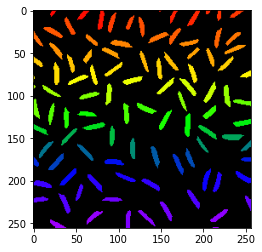

In [2]:
# reading the image a s an eight bit grayscale image
# so the pixel values are in the range 0-255
img = cv.imread("../a01images/rice.png", cv.IMREAD_GRAYSCALE)
cv.imwrite('LaTeX Report/figures/part2/2original.png',img)

#--------------------binary segmentation------------------
# transform input image into pure black and white form
# pure white - rice grains
# pure black - background

# adaptive thresholding due to non uniform illumination in the image
img_adapt_thresh = th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,25,-20)
cv.imwrite('LaTeX Report/figures/part2/img_adapt_thresh.png',img_adapt_thresh)

# Morphological transformation:  Erosion
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
# to eliminate white noise and detach connected objects
ksize = 3
kernel = cv.getStructuringElement(cv.MORPH_RECT,(ksize,ksize))
eroded_img = cv.erode(img_adapt_thresh, kernel)
cv.imwrite('LaTeX Report/figures/part2/eroded_img.png',eroded_img)

#---------------------Connected components Analysis(CCA)----------------------
num_labels, labeledImg = cv.connectedComponents(eroded_img)
cv.imwrite('LaTeX Report/figures/part2/labeledImg.png',labeledImg)

# Background is considered as another object in CCA.
# Therfore it needs to be subtracted to get the grain count
num_grains = num_labels -1
print(num_grains)

#-------------------Show components using a color Map.-------------------------

# find min and max pixel values and their locations the image.
(minVal, maxVal, minLoc, maxLoc) = cv.minMaxLoc(labeledImg)

# Normalize the image so the min value is 0 and max value is 255.
labeledImg = (255/(maxVal-minVal)) * (labeledImg - minVal)

# Applying the color map for better visulization
imgColorMap = cv.applyColorMap(labeledImg.astype('uint8'), cv.COLORMAP_RAINBOW)

# Making the background black
imgColorMap[labeledImg==0] = 0
cv.imwrite('LaTeX Report/figures/part2/imgColorMap.png',imgColorMap)

# Display colormapped labels
plt.imshow(imgColorMap[:,:,::-1])